# **Imports**

In [1]:
# sklearn analytics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Models
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import Birch

# Text Preprocessing
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,\
    TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline


# General
import warnings
import numpy as np
import pandas as pd
import nltk
import random
import os
import re
import string
import statsmodels.api as sm
from os import path
from PIL import Image
from time import time


# NLP
from nltk import sent_tokenize, word_tokenize
from nltk.util import ngrams
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = stopwords.words('english')
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from subprocess import check_output
from collections import Counter
import spacy
nlp = spacy.load('en')

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#551A8B",
])

# Warnings
warnings.filterwarnings('ignore')

from google.colab import drive, files
drive.mount('/content/gdrive', force_remount=True)


!pip install emoji
import emoji

from textblob import TextBlob

!pip install tweet-preprocessor
import preprocessor as p

!pip install plotly
import plotly

#!pip install -q keras
#import keras

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
import torchvision


# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
  Running setup.py bdist_wheel for tweet-preprocessor ... - \ done
  Stored in directory: /root/.cache/pip/wheels/1b/27/cc/49938e98a2470802ebdefae9d2b3f524768e970c1ebbe2dc4a
Successfully built tweet-preprocessor
fastai 1.0.41 has requirement

In [2]:
# Read and Peak at Data
df = pd.read_csv('/content/gdrive/My Drive/Data Science/trump.csv', sep='\t') 

# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x, len(df[x].unique()), df[x].isnull().sum()])

# Missing Values
print("Missing Values: {}".format(df.isnull().sum().sum()))

# Data Dimensions
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))

# Convert to tweet to string
df['tweet'] = df['tweet'].astype(str)

# Create New Variables:
# Word Length
df["word_count"] = df['tweet'].str.split().apply(len)
# Character Length
df["character_count"] = df['tweet'].apply(len)

Missing Values: 184956
Dataframe Dimension: 430228 Rows, 5 Columns


In [3]:
df.head()

,time,tweet,id,username,location,word_count,character_count
0,1547856694.7658603,'RT @SethAbramson: In case you missed it: what...,79549,SmithEckert13,"Fort Wayne, IN",25,155
1,1547856694.7953787,'RT @RonWyden: Incredible. More luxury travel ...,79550,QueenTAG,"Scotts Valley, CA",22,149
2,1547856694.8134415,'President Trump Directed Michael Cohen To Lie...,79551,vkrgz,Dünyanın içinden,16,125
3,1547856694.8526797,'RT @TeaPainUSA: Tea would wager that Trump in...,79552,ChazGohVan,Jupiter UNIVERSE,26,147
4,1547856694.904921,'RT @BruceBartlett: There is one person in Ame...,79553,JudyPrincz,"Manhattan, NY",24,147


In [4]:
df.describe()

,word_count,character_count
count,430228.000000,430228.000000
mean,18.674238,122.972138
std,6.134861,33.739280
min,1.000000,1.000000
25%,16.000000,122.000000
50%,20.000000,140.000000
75%,23.000000,140.000000
max,37.000000,258.000000


In [5]:
df.tweet[5000]

'RT @Chef_Epsimos: @shannonrwatts Everyone should start tweeting trump #PresidentPelosi'

# **Data Cleaning**

In [6]:

# Importing SKLearn's list of stopwords and 
# then appending with my own words
stop = text.ENGLISH_STOP_WORDS
      
# Basic text cleaning function that also removes stopwords
def remove_noise(text):

    # Remove Mentions
   # text = text.apply(lambda x: re.compile('\#').sub('', re.compile(
        #'RT @').sub('@', x, count=1).strip()))
    
    # Remove URLs
    text = text.str.replace('https?://[A-Za-z0-9./]+','')
    
    # Keep Hashtag text
    text = text.str.replace("[^a-zA-Z]", " ")
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))

    # Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))

    # Remove special characters
    text = text.apply(lambda x: "".join(
        [" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')

    # Remove numbers
    text = text.str.replace('\d+', '')

    # Remove Stopwords
    text = text.apply(lambda x: ' '.join(
        [word for word in x.split() if word not in (stop)]))

    # Convert to string
    text = text.astype(str)

    return text
   
# Function to remove RT @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  
  

# remove  RT: @user
df['filtered_tweet'] = np.vectorize(
    remove_pattern)(df['tweet'], "RT @[\w]*")

# Apply cleaner function
df['filtered_tweet'] = remove_noise(df['filtered_tweet'])

df = df.drop(['time', 'id', 'username', 'location'], axis=1)
df.head(5)

,tweet,word_count,character_count,filtered_tweet
0,'RT @SethAbramson: In case you missed it: what...,25,155,case missed fuss tonight retweet think followe...
1,'RT @RonWyden: Incredible. More luxury travel ...,22,149,incredible luxury travel trump administration ...
2,'President Trump Directed Michael Cohen To Lie...,16,125,president trump directed michael cohen lie con...
3,'RT @TeaPainUSA: Tea would wager that Trump in...,26,147,tea wager trump instructed folks lie congress ...
4,'RT @BruceBartlett: There is one person in Ame...,24,147,person america trump chose rupert murdoch medi...


In [0]:
#Second Cleaning Function that keeps stopwords
def extract_text(text):
    
    # Convert to string
    text = text.astype(str)
    
    # Remove URLs
    text = text.str.replace('https?://[A-Za-z0-9./]+','')
    
    # Keep Hashtag text
    text = text.str.replace("[^a-zA-Z]", " ")
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))

    # Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))

    # Remove special characters
    text = text.apply(lambda x: "".join(
        [" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')

    # Remove numbers
    text = text.str.replace('\d+', '')
    
    #Remove 1-2 letter clutter remnants
    text = text.apply(lambda x: re.sub(r'\b\w{1,2}\b', '', x))

    return text

# remove  RT: @user
df['clean'] = np.vectorize(remove_pattern)(df['tweet'], "RT @[\w]*")


# Applying function to data
df['clean'] = extract_text(df['clean'])


In [8]:
print(df.tweet[5])
print(df.clean[5])

'RT @cher: trump\u2019s A CROOK &amp; LIAR,IF HE WAS THE HEAD OF ANY COMPANY HE WOULD BE FIRED.THE IMMEDIATE CRISIS, \n800,000.00 PPL ARE LOSING THE L\u2026'
trump    crook amp liar   was the head  any company  would  fired the immediate crisis  ppl are losing the  


# Sentiment Labelling

The sentiment property of Texblob returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. We will use this to label tweets as positive, neutral, or negative. 

I will label anything with a polarity of exactly zero as neutral and remove the data rows with that label, leaving only polar data points. Then we can see if this method of labeling works for training a classifier.

In [9]:
def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

# Create a column with the result of the analysis:
df['SA'] = np.array(
    [analyze_sentiment(tweet) for tweet in df['filtered_tweet']])

df['SA2'] = np.array(
    [analyze_sentiment(tweet) for tweet in df['clean']])

df.head()

,tweet,word_count,character_count,filtered_tweet,clean,SA,SA2
0,'RT @SethAbramson: In case you missed it: what...,25,155,case missed fuss tonight retweet think followe...,case you missed what all the fuss about ton...,0,0
1,'RT @RonWyden: Incredible. More luxury travel ...,22,149,incredible luxury travel trump administration ...,incredible more luxury travel from the trump a...,1,1
2,'President Trump Directed Michael Cohen To Lie...,16,125,president trump directed michael cohen lie con...,president trump directed michael cohen lie c...,0,0
3,'RT @TeaPainUSA: Tea would wager that Trump in...,26,147,tea wager trump instructed folks lie congress ...,tea would wager that trump instructed all his ...,0,-1
4,'RT @BruceBartlett: There is one person in Ame...,24,147,person america trump chose rupert murdoch medi...,there one person america who could somethin...,0,0


In [10]:
print(df.tweet[3])

'RT @TeaPainUSA: Tea would wager that Trump instructed all his folks to lie to Congress because he knew Nunes and his other GOP imps and dem\u2026'


Looking at the Tweet at index 3 we can see there is a polarity differnce between the filtered tweet and the clean tweet. This could mean that stop words impact the way Textblob assess polarity. 

Intuitively I would call this tweet negative as it is objectively critical. As such, I'll use the SA2 variable as my label.

I'm going to drop all the neutral tweets since I'm interetsed in binary sentiment classification.

In [11]:
# Make a copy of the data frame for later, and dropping neutral tweets
df2 = df[df.SA2 != 0]

# Dropping neutral tweets
df = df[df.SA != 0]

print('DF has {} rows.'.format(len(df)))
print('DF2 has {} rows.'.format(len(df2)))
print('\n')
print('DF2 has {} negative comments.'.format(
    (df2.SA2 != 0).sum()))
print('DF2 has {} positive comments.'.format(
    (df2.SA2 != 1).sum()))



DF has 238014 rows.
DF2 has 257218 rows.


DF2 has 257218 negative comments.
DF2 has 93343 positive comments.


# **EDA**

First I'm going to do some data organization and trimming to build data frame copies for later. EDA will mostly focus on the full, imbalanced data set.

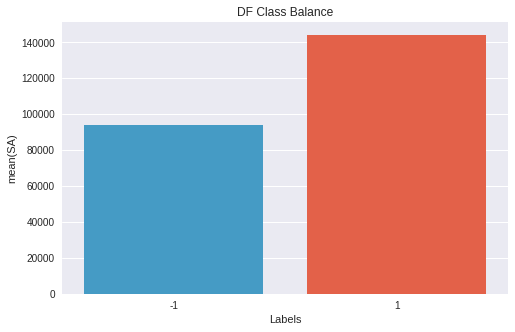

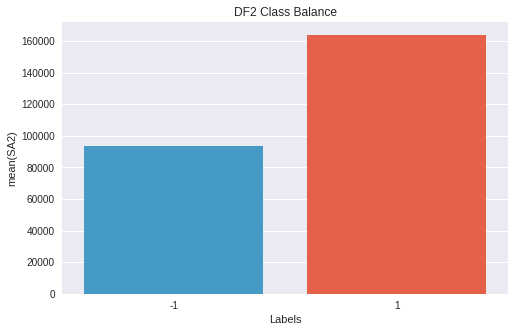

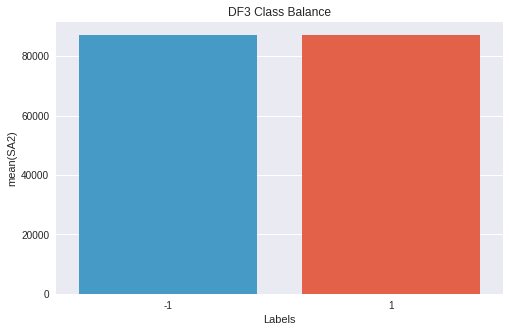

In [12]:
# Removed data to give even batch sizes DF
remove_n = len(df)%50
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df = df.drop(drop_indices)

# Plot the label classes
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x=df.SA.unique(),y=df.SA.value_counts());
ax.set(xlabel='Labels')
ax.set_title('DF Class Balance')

# Removed data to give even batch sizes DF2
remove_n = len(df2)%50
drop_indices2 = np.random.choice(df2.index, remove_n, replace=False)
df2 = df2.drop(drop_indices2)

# Plot the label classes
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x=df2.SA2.unique(),y=df2.SA2.value_counts());
ax.set(xlabel='Labels')
ax.set_title('DF2 Class Balance')
plt.savefig('Imbalanced.png')
#files.download('Imbalanced.png')

#Define DF Copy to Reduce and set len
#for each class equal to len og minority class
df3 = pd.concat(g.sample(87155) for idx, g in df2.groupby('SA2'))
df3 = df3.sample(frac=1)

# Removed data to give even batch sizes DF3
remove_n = len(df3)%50
drop_indices3 = np.random.choice(df3.index, remove_n, replace=False)
df3 = df3.drop(drop_indices3)

# Plot the label classes
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x=df3.SA2.unique(),y=df3.SA2.value_counts());
ax.set(xlabel='Labels')
ax.set_title('DF3 Class Balance')

plt.savefig('Balanced.png')
#files.download('Balancing.png')
plt.show()

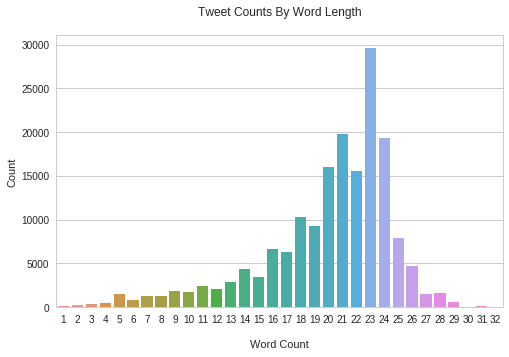

In [13]:
# Exploring tweet word count
z = df3.groupby(by=['word_count'], as_index=False).count(
).sort_values(by='SA2', ascending=False)

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['word_count'], y=z['SA2'], data=z)
plt.xlabel("\nWord Count")
plt.ylabel("Count")
plt.title("Tweet Counts By Word Length\n")
plt.savefig("Counts By Word Length.png", dpi=300)
#files.download("Counts By Word Length.png")
plt.show()

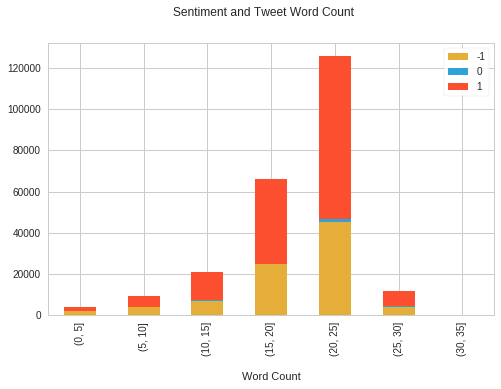

In [14]:
# Exploring Word Count.
colors = color={-1: "#e5ae38",
                0: '#30a2da',
                1: '#fc4f30'}
f, ax = plt.subplots(figsize=(8, 5))
df.groupby(['SA2', pd.cut(df['word_count'], np.arange(0, 40, 5))])\
    .size()\
    .unstack(0)\
    .plot.bar(stacked=True, ax=ax, color=colors.values())
#plt.subplots_adjust(top=.8)
plt.suptitle('Sentiment and Tweet Word Count')
plt.xlabel("\nWord Count")
ax.legend(loc='best', frameon=True)
#plt.savefig("Sentiment and Word Count.png")
#files.download("Sentiment and Word Count.png")
#plt.tight_layout()
plt.show()

We can see similar distribution of word counts, regardless of sentiment. The size difference of the  bars is likely due to the class imbalance we've observed. This could be verified by running the same plot on the trimmed data (DF3).

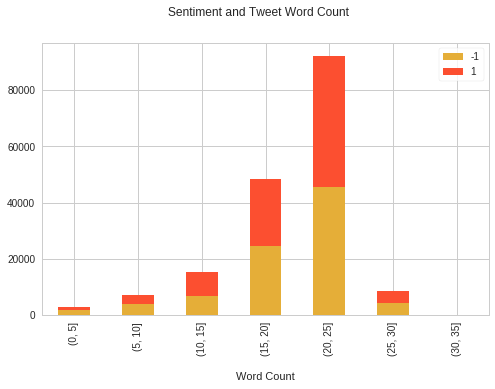

In [15]:
# Exploring Word Count.
colors = color={-1: "#e5ae38",
                1: '#fc4f30'}
f, ax = plt.subplots(figsize=(8, 5))
df3.groupby(['SA2', pd.cut(df3['word_count'], np.arange(0, 40, 5))])\
    .size()\
    .unstack(0)\
    .plot.bar(stacked=True, ax=ax, color=colors.values())
#plt.subplots_adjust(top=.8)
plt.suptitle('Sentiment and Tweet Word Count')
plt.xlabel("\nWord Count")
ax.legend(loc='best', frameon=True)
plt.savefig("Sentiment and Word Count.png", dpi=300)
files.download("Sentiment and Word Count.png")
#plt.tight_layout()
plt.show()

Voilà! 

In [0]:
# Saving labeled and balanced DF
df3.to_csv('clean_labeled_data.csv')
files.download('clean_labeled_data.csv')